In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def detect_keypoints(img):
    # Create SIFT object
    sift = cv2.SIFT_create()

    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect keypoints and compute descriptors
    kp, des = sift.detectAndCompute(gray, None)

    return kp, des

def draw_match_keypoints(img1, kp1, des1, img2, kp2, des2,point_match=200):
    # Create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)
    matches = matches[:point_match]
    
    # Create an empty image to hold the matches
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]
    outImg = np.zeros((max([rows1, rows2]), cols1+cols2, 3), dtype=np.uint8)
    outImg[:rows1, :cols1] = img1
    outImg[:rows2, cols1:] = img2

    img3 = cv2.drawMatches(img1, kp1, img2, kp2 ,matches, outImg, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the matched images side by side
    plt.figure(figsize=(20, 12))
    plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
    plt.title('Keypoints Matching between Image 1 and Image 2')
    plt.show()

    return matches

def draw_keypoints(img, kp,title='Image with Keypoints'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.scatter([p.pt[0] for p in kp], [p.pt[1] for p in kp], c='r', s=5)
    plt.title(title)
    plt.show()

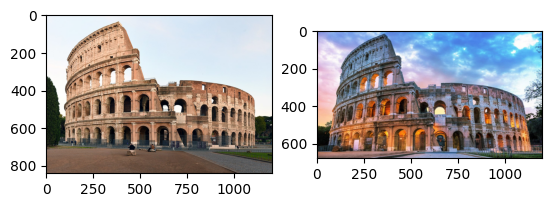

In [57]:
# Draw 2 original images side by side, without kp
def draw_images(img1, img2):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.show()
    
draw_images(cv2.imread('img1.jpg'), cv2.imread('img2.jpg'))


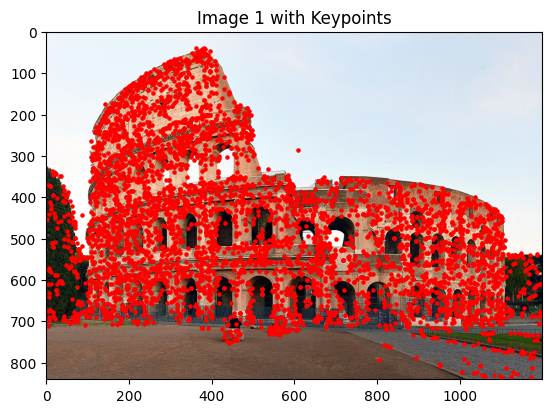

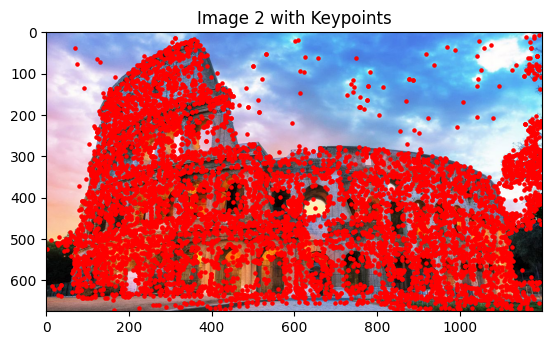

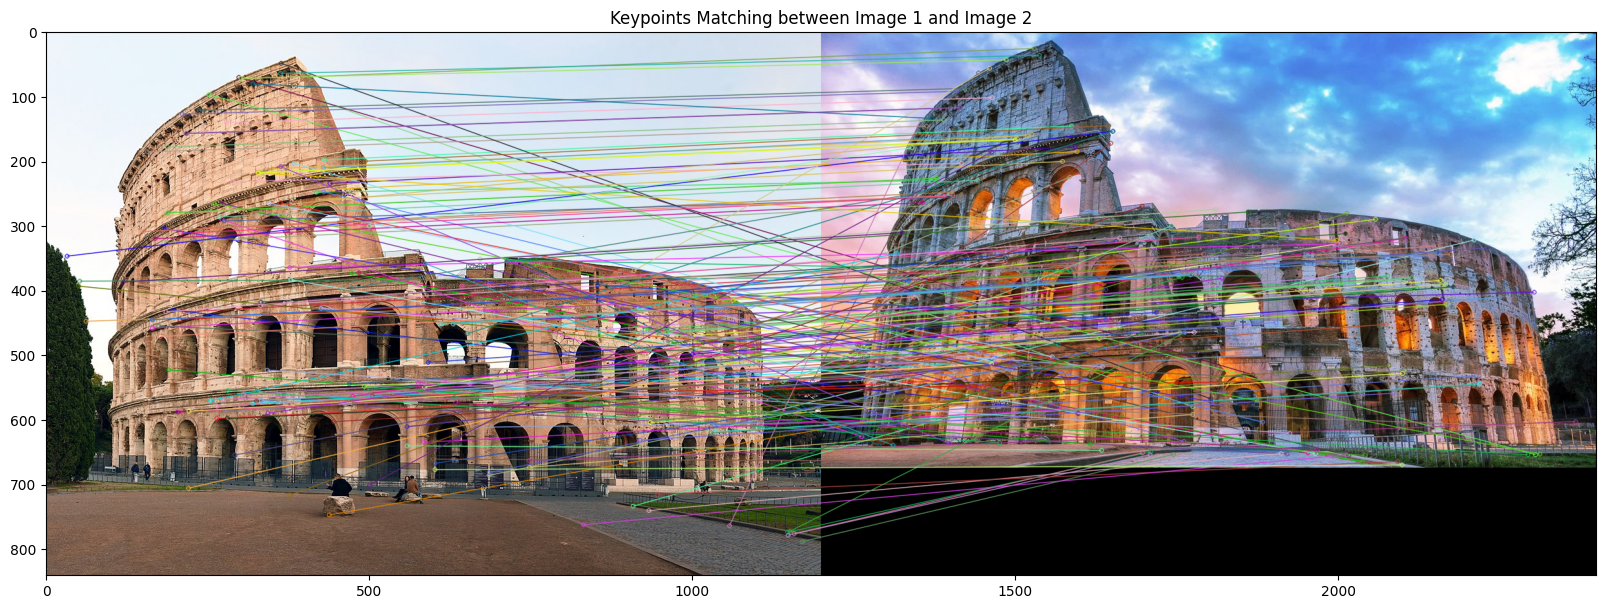

In [58]:
img1_path = 'img1.jpg'
kp_img1=detect_keypoints(cv2.imread(img1_path))
draw_keypoints(cv2.imread(img1_path),kp_img1[0],title='Image 1 with Keypoints')

img2_path = 'img2.jpg'
kp_img2=detect_keypoints(cv2.imread(img2_path))
draw_keypoints(cv2.imread(img2_path),kp_img2[0],title='Image 2 with Keypoints')

limit_keypoints=200
drawing=draw_match_keypoints(cv2.imread(img1_path)
                            ,kp_img1[0]
                            ,kp_img1[1]
                            ,cv2.imread(img2_path)
                            ,kp_img2[0]
                            ,kp_img2[1],
                            limit_keypoints)
